In [41]:
import os
import torchaudio
import torch
import matplotlib.pyplot as plt
import numpy as np
import librosa

In [42]:
def plot_waveform(waveform, sr, title="Waveform"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    figure, axes = plt.subplots(num_channels, 1)
    axes.plot(time_axis, waveform[0], linewidth=1)
    axes.grid(True)
    figure.suptitle(title)
    plt.show(block=False)


def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)


def plot_fbank(fbank, title=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Filter bank")
    axs.imshow(fbank, aspect="auto")
    axs.set_ylabel("frequency bin")
    axs.set_xlabel("mel bin")
    plt.show(block=False)

In [22]:
fname = './section_00_source_train_normal_0000_A1Spd28VMic1.wav'

In [23]:
audio, sample_rate = torchaudio.load(fname)

In [28]:
audio[:,:10]

tensor([[0.0302, 0.0474, 0.0417, 0.0480, 0.0479, 0.0465, 0.0461, 0.0460, 0.0440,
         0.0421]])

In [26]:
audio.shape

torch.Size([1, 160000])

In [25]:
sample_rate

16000

In [29]:
audio_sec = audio.shape[1] / sample_rate
audio_sec

10.0

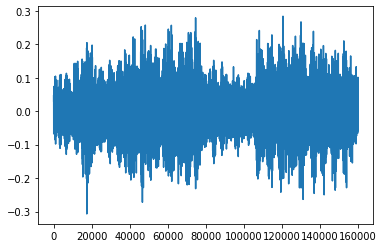

In [36]:
fig = plt.figure()
plt.plot(np.arange(audio.shape[1]), audio[0,:])

plt.show()

In [77]:
batch_size = 128
n_mels = 10
n_frames = 1
n_hop_frames = 1
n_fft = 4096
hop_length = 80
power = 2.0

melspectrogram = torchaudio.transforms.MelSpectrogram(
                                                    n_fft=n_fft,
                                                    hop_length=hop_length,
                                                    n_mels=n_mels,
                                                    power=power)


resampler = torchaudio.transforms.Resample(sample_rate, 16384, dtype=audio.dtype)
resampled_waveform = resampler(audio)

melspec = melspectrogram(audio)
print(melspec.shape)

r_melspec = melspectrogram(resampled_waveform)
print(r_melspec.shape)

torch.Size([1, 10, 2001])
torch.Size([1, 10, 2049])


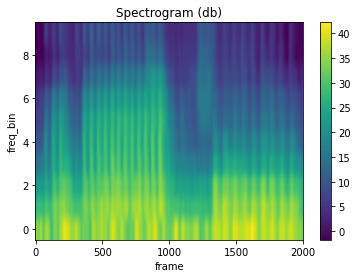

In [66]:
plot_spectrogram(melspec[0])